# Model Iteration - ExtraTreesClassifier
Based on the results of the previous script, we perform hyperparameter search for a model with an ExtraTreesClassifier.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, average_precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from sklearn.metrics import PrecisionRecallDisplay

import utils

# Functions

In [2]:
def run_etc(windowsize, stepsize, X_train, y_train, groups_train, X_test, y_test, groups_test):
    '''
    Takes the prepared data and group indication for training and testing a ExtraTreesClassifier pipeline.
    Returns X_train, y_train, groups_train, X_test, y_test, groups_test.
    Prints out info during creation.
    '''
    
    pipe = Pipeline(
    steps=[
           ('scaler', MaxAbsScaler()),
           ('etc', ExtraTreesClassifier())
    ]
    )
    
    search_space = {'scaler': [MaxAbsScaler()],
                    'etc__bootstrap': [True, False],
                    'etc__criterion': ['gini', 'entropy', 'log_loss'],
                    'etc__max_features': [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                    'etc__min_samples_leaf': [4,5,6,7,8,9,10,11,12,13,14,15],
                    'etc__min_samples_split': [4,5,6,7,8,9,10,11,12,13,14,15],
                    'etc__n_estimators': [10,25,50,75,100,150,200,250,300,350]
    }
    
    bayes = BayesSearchCV(estimator = pipe, 
                      search_spaces = search_space, 
                      scoring = 'f1', 
                      refit = 'f1',
                      n_jobs = -1, 
                      #n_points = 5,
                      pre_dispatch = 'n_jobs*2',
                      #cv=inner_cv,
                      verbose = 10,
                      n_iter = 200,
                      random_state=0)
    
    bayes.fit(X_train, y_train.values.ravel(), groups=groups_train.values.ravel())
    
    print('Best training params and score:')
    print(bayes.best_params_)
    print(bayes.best_score_)

    print(f"Score (F1) on test data: {bayes.score(X_test, y_test.values.ravel()):.2f}")

    y_test_predict = bayes.predict(X_test)
    y_test_predict_proba = bayes.predict_proba(X_test)[:,1]

    print('accuracy: '+str(accuracy_score(y_test, y_test_predict)))
    print('precision: '+str(precision_score(y_test, y_test_predict)))
    print('recall: '+str(recall_score(y_test, y_test_predict)))
    print('f1_score: '+str(f1_score(y_test, y_test_predict)))
    print('roc_auc: '+str(roc_auc_score(y_test, y_test_predict)))
    print('Class distribution in test set: \n', y_test['label'].value_counts(normalize=True), '\n')
    print('average_precision: '+str(average_precision_score(y_test, y_test_predict_proba)))

    confusion_matrix(y_test, y_test_predict)

    prd = PrecisionRecallDisplay.from_predictions(y_test, y_test_predict_proba, name='Model')
    _ = prd.ax_.set_title('2-class Precision-Recall curve')
    print('The baseline to beat is the percentage of positive cases:', y_test['label'].value_counts(normalize=True)[1])
    plt.show()

    print('===============================================\n\n')

In [3]:
def full_run_etc(windowsize, stepsize):
    '''
    Reads data and runs ExtraTreesClassifier pipeline.
    '''

    X_train, y_train, groups_train, X_test, y_test, groups_test = utils.read_data(windowsize, stepsize)
    run_etc(windowsize, stepsize, X_train, y_train, groups_train, X_test, y_test, groups_test)

# Run ExtraTreesClassifier Pipelines

Window Size:  30   Stepsize:  1
train shape:  (22038, 71)
test shape:  (5509, 71)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_sum', 'bvp_BVP_skewness',
       'bvp_BVP_kurtosis', 'bvp_BVP_peaks', 'bvp_BVP_n_above_mean',
       'bvp_BVP_n_below_mean', 'bvp_BVP_n_sign_changes',
       'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy', 'bvp_l2_min',
       'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_lineintegral',
       'acc_x_n_above_mean', 'acc_x_n_sign_changes', 'acc_x_iqr', 'acc_y_mean',
       'acc_y_std', 'acc_y_energy', 'acc_y_skewness', 'acc_y_kurtosis',
       'acc_y_peaks', 'acc_y_n_above_mean', 'acc_y_n_sign_changes',
       'acc_y_iqr', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std',
       'acc_z_min', 'acc_z_max', 'acc_z_energy', 'acc_z_skewness',
       'acc_z_kurtosis', 'acc_z_peaks', 'acc_z_n_ab

c:\Tools\anaconda3\envs\stress01\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Tools\anaconda3\envs\stress01\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Tools\anaconda3\envs\stress01\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Tools\anaconda3\envs\stress01\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Tools\anaconda3\envs\stress01\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Tools\anaconda3\envs\stress01\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best training params and score:
OrderedDict([('etc__bootstrap', True), ('etc__criterion', 'log_loss'), ('etc__max_features', 0.6), ('etc__min_samples_leaf', 5), ('etc__min_samples_split', 14), ('etc__n_estimators', 50), ('scaler', MaxAbsScaler())])
0.9025261381041325
Score (F1) on test data:

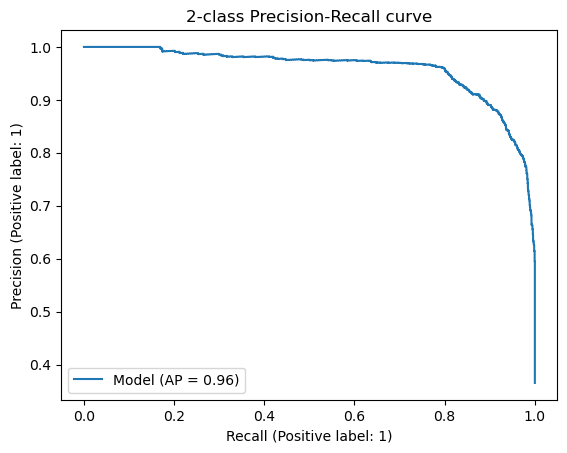



CPU times: total: 1min 46s
Wall time: 23min 3s


In [4]:
%%time

full_run_etc(30, 1)

# Interpretation

We conducted hyperparameter search for an ExtraTreesClassifier on the dataset with windows size 30 and step size 1.

The result is an F1 score of 0.87, with a precision of 0.94 and a recall of 0.82.

The found hyperparameters of the model are:

* 'bootstrap', True
* 'etc__criterion', 'log_loss'
* 'etc__max_features', 0.6
* 'etc__min_samples_leaf', 5
* 'etc__min_samples_split', 14
* 'etc__n_estimators', 50)